In [2]:
import talib as ta
import numpy as np
import pandas as pd
"""
# 액면분할 수정주가 반영
df = pd.read_csv('035420.csv')
df2 = df.iloc[:186]
columns = ['close', 'open', 'high', 'low', 'eps', 'bps', 'dividend_per_stock']
for column in columns:
    df2[column] = df2[column]/5.0
df3 = df.iloc[189:]
df4 = pd.concat([df2,df3],axis=0)
"""

"\n# 액면분할 수정주가 반영\ndf = pd.read_csv('035420.csv')\ndf2 = df.iloc[:186]\ncolumns = ['close', 'open', 'high', 'low', 'eps', 'bps', 'dividend_per_stock']\nfor column in columns:\n    df2[column] = df2[column]/5.0\ndf3 = df.iloc[189:]\ndf4 = pd.concat([df2,df3],axis=0)\n"

In [3]:
import talib as ta
import numpy as np
import pandas as pd

df4 = pd.read_csv('122870.csv')

In [4]:
df4 = df4.dropna()
# 보조지표 추가
# 1) 이평선(SMA, EMA, WMA) (w = 5,10,15,20,30,60,120)
df4['ma_5'] = ta.SMA(df4.close, timeperiod=5)
df4['ma_10'] = ta.SMA(df4.close, timeperiod=10)
df4['ma_15'] = ta.SMA(df4.close, timeperiod=15)
df4['ma_20'] = ta.SMA(df4.close, timeperiod=20)
df4['ma_30'] = ta.SMA(df4.close, timeperiod=30)
df4['ma_60'] = ta.SMA(df4.close, timeperiod=60)
df4['ma_120'] = ta.SMA(df4.close, timeperiod=120)

df4['ema_5'] = ta.EMA(df4.close, timeperiod=5)
df4['ema_10'] = ta.EMA(df4.close, timeperiod=10)
df4['ema_15'] = ta.EMA(df4.close, timeperiod=15)
df4['ema_20'] = ta.EMA(df4.close, timeperiod=20)
df4['ema_30'] = ta.EMA(df4.close, timeperiod=30)
df4['ema_60'] = ta.EMA(df4.close, timeperiod=60)
df4['ema_120'] = ta.EMA(df4.close, timeperiod=120)

df4['wma_5'] = ta.WMA(df4.close, timeperiod=5)
df4['wma_10'] = ta.WMA(df4.close, timeperiod=10)
df4['wma_15'] = ta.WMA(df4.close, timeperiod=15)
df4['wma_20'] = ta.WMA(df4.close, timeperiod=20)
df4['wma_30'] = ta.WMA(df4.close, timeperiod=30)
df4['wma_60'] = ta.WMA(df4.close, timeperiod=60)
df4['wma_120'] = ta.WMA(df4.close, timeperiod=120)

df4['ma_v5'] = ta.SMA(df4.volume, timeperiod=5)
df4['ma_v10'] = ta.SMA(df4.volume, timeperiod=10)
df4['ma_v20'] = ta.SMA(df4.volume, timeperiod=20)
df4['ma_v60'] = ta.SMA(df4.volume, timeperiod=60)
df4['ma_v120'] = ta.SMA(df4.volume, timeperiod=120)

df4['ma_inst_v5'] = ta.SMA(df4.volume_inst_pure_buy, timeperiod=5)
df4['ma_inst_v10'] = ta.SMA(df4.volume_inst_pure_buy, timeperiod=10)
df4['ma_inst_v20'] = ta.SMA(df4.volume_inst_pure_buy, timeperiod=20)
df4['ma_inst_v60'] = ta.SMA(df4.volume_inst_pure_buy, timeperiod=60)
df4['ma_inst_v120'] = ta.SMA(df4.volume_inst_pure_buy, timeperiod=120)

df4['ma_fore_v5'] = ta.SMA(df4.volume_fore_pure_buy, timeperiod=5)
df4['ma_fore_v10'] = ta.SMA(df4.volume_fore_pure_buy, timeperiod=10)
df4['ma_fore_v20'] = ta.SMA(df4.volume_fore_pure_buy, timeperiod=20)
df4['ma_fore_v60'] = ta.SMA(df4.volume_fore_pure_buy, timeperiod=60)
df4['ma_fore_v120'] = ta.SMA(df4.volume_fore_pure_buy, timeperiod=120)

In [5]:
# 2) 볼린저밴드 (주가의 이동평균선을 중심으로 표준편차 범위를 표시)
ubb, mbb, lbb = ta.BBANDS(df4.close, 20, 2)
df4['ubb'] = ubb
df4['mbb'] = mbb
df4['lbb'] = lbb

In [6]:
# 3) MACD 이동평균수렴확산 (단기(EMA12)와 장기(EMA26) EMA로 모멘텀을 추정)
macd, macdsignal9, macdhist = ta.MACD(df4.close, fastperiod=12, slowperiod=26, signalperiod=9)
df4['macd'] = macd
df4['macdsignal9'] = macdsignal9
df4['macdhist'] = macdhist

In [7]:
# 4) RSI 상대강도지수 - 추세의 강도 파악, 과매수, 과매도 국면 판단
df4['rsi'] = ta.RSI(df4.close, timeperiod=14)

In [8]:
# 5) 스토캐스틱 오늘의 주가가 일정 동안 주가의 변동폭 중에서 어느 정도인 지?
slowk, slowd = ta.STOCH(df4.high, df4.low, df4.close, fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
fastk, fastd = ta.STOCHF(df4.high, df4.low, df4.close, fastk_period=5, fastd_period=3, fastd_matype=0)
fastk_rsi, fastd_rsi = ta.STOCHRSI(df4.close, timeperiod=14, fastk_period=5, fastd_period=3, fastd_matype=0)
df4['slowk'] = slowk
df4['slowd'] = slowd
df4['fastk'] = fastk
df4['fastd'] = fastd
df4['fastk_rsi'] = fastk_rsi
df4['fastd_rsi'] = fastd_rsi

In [9]:
# 6) 기타 자주 사용되는 것들
# CCI (Commodity Channel Index), williams'%R, parabolic SAR
# ADX (Average Directional Movement Index)
# plusDI(Plus Directional Indicator), plusDM Plus Directional Movement)
# ATR (Average True Range), OBV (On Balance Volume) 거래량 분석을 통한 주가분석, Variance
df4['cci'] = ta.CCI(df4.high, df4.low, df4.close, timeperiod=14)
df4['willR'] = ta.WILLR(df4.high, df4.low, df4.close, timeperiod=14)
df4['sar'] = ta.SAR(df4.high, df4.low, acceleration=0, maximum=0)
df4['adx'] = ta.ADX(df4.high, df4.low, df4.close, timeperiod=14)
df4['plus_di'] = ta.PLUS_DI(df4.high, df4.low, df4.close, timeperiod=14)
df4['plus_dm'] = ta.PLUS_DM(df4.high, df4.low, timeperiod=14)
df4['atr'] = ta.ATR(df4.high, df4.low, df4.close, timeperiod=14)
df4['obv'] = ta.OBV(df4.close, df4.volume)
df4['var'] = ta.VAR(df4.close, timeperiod=5, nbdev=1)

In [27]:
# 7) Pattern REcognition
# Investopedia "The 5 Most Powerful Candlestick Patterns"
# Three Line Strike, Three Black Crows
# Evening Star, Abandoned Baby
# df4['line_str'] = ta.CDL3LINESTRIKE(df4.open, df4.high, df4.low, df4.close)
# df4['blk_crw'] = ta.CDL3BLACKCROWS(df4.open, df4.high, df4.low, df4.close)
# df4['evn_star'] = ta.CDLEVENINGSTAR(df4.open, df4.high, df4.low, df4.close, penetration=0)
# df4['abn_baby'] = ta.CDLABANDONEDBABY(df4.open, df4.high, df4.low, df4.close, penetration=0)

In [10]:
df4.to_csv("ex.csv", mode='w', index=False)

In [11]:
def feature_scaling(df, scaling_strategy="min-max", column=None):
    if column == None:
        column = [column_name for column_name in df.columns]
    for column_name in column:
        if scaling_strategy == "min-max":
            df[column_name] = ( df[column_name] - df[column_name].min() ) /\
                            (df[column_name].max() - df[column_name].min()) 
        elif scaling_strategy == "z-score":
            df[column_name] = ( df[column_name] - \
                               df[column_name].mean() ) /\
                            (df[column_name].std() )
    return df
scaling_col = [column for column in df4.columns]
scaling_col.pop(0)
df_rev = df4.copy()
df_rev = df_rev.dropna()
feature_scaling(df_rev, scaling_strategy="z-score", column=scaling_col)
df_rev.to_csv("ex3.csv", mode='w', index=False)

In [12]:
result = [column for column in df_rev.columns]
print(result)
print(len(result))

['date', 'open', 'high', 'low', 'close', 'volume', 'value', 'stock_value', 'stock_volume', 'bps', 'pbr', 'dividend_per_stock', 'dividend_yield_ratio', 'volume_inst_buy', 'volume_inst_sell', 'volume_inst_pure_buy', 'volume_fore_buy', 'volume_fore_sell', 'volume_fore_pure_buy', 'value_inst_buy', 'value_inst_sell', 'value_inst_pure_buy', 'value_fore_buy', 'value_fore_sell', 'value_fore_pure_buy', 'kosdaq_close', 'kosdaq_open', 'kosdaq_high', 'kosdaq_low', 'kosdaq_volume', 'kosdaq_value', 'kosdaq_stock_value', 'kosdaq150_close', 'kosdaq150_open', 'kosdaq150_high', 'kosdaq150_low', 'kosdaq150_volume', 'kosdaq150_value', 'kosdaq150_stock_value', 'kosdaq150_comm_close', 'kosdaq150_comm_open', 'kosdaq150_comm_high', 'kosdaq150_comm_low', 'kosdaq150_comm_volume', 'kosdaq150_comm_value', 'kosdaq150_comm_stock_value', 'kosdaq_large_close', 'kosdaq_large_open', 'kosdaq_large_high', 'kosdaq_large_low', 'kosdaq_large_volume', 'kosdaq_large_value', 'kosdaq_large_stock_value', 'kosdaq_enter_close', 'k

In [13]:
# 상관계수
corr = df_rev.corr(method='pearson')

corr.to_csv("corr.csv", mode='w')

In [151]:
# 회귀 모델
import numpy as np
import pandas as pd

import sklearn
from sklearn.tree import DecisionTreeRegressor # 모델링
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
import lightgbm as lgb

import shap
import skimage

import os
import random # 시드 제어

import seaborn as sns # 시각화
import matplotlib.pyplot as plt # 시각화

# 1) Decision Tree

# Set Random Seed
seed = 1
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
random.seed(seed)

# 데이터 불러오기
train_data = pd.read_csv("ex3.csv")
test_data = pd.read_csv("ex3_test.csv")

# 평가지표 SMAPE
def smape(predicted_values, actual_values):
    # 넘파이로 배열 형태로 바꿔준다.
    predicted_values = np.array(predicted_values)
    actual_values = np.array(actual_values)
    '''
    This function calculates SMAPE between two lists.
    '''
    score = 100*np.mean(2*abs(predicted_values - actual_values)/(abs(predicted_values)+abs(actual_values)))
    return score

In [152]:
feature_names = [column for column in train_data.columns]

X_train = train_data[feature_names]
y_train = train_data['close']
X_test = test_data[feature_names]
y_test = test_data['close']
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

tree = DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None, max_features=None, 
                             max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, 
                             min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, 
                             presort='deprecated', random_state=seed, splitter='best')

(433, 139) (433,) (118, 139) (118,)


val_SMAPE= 6.00146
(118,)
[-1.38467003 -1.26427534 -1.29437402 -1.14990039 -1.11980172 -0.98134782
 -0.93920968 -0.71647951 -0.84289393 -0.71647951]
test_SMAPE= 40.70313


[Text(0.5, 1.0, 'test')]

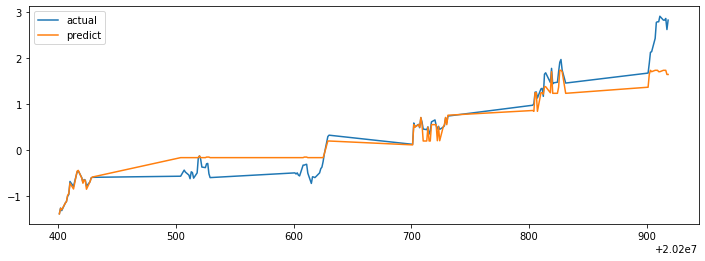

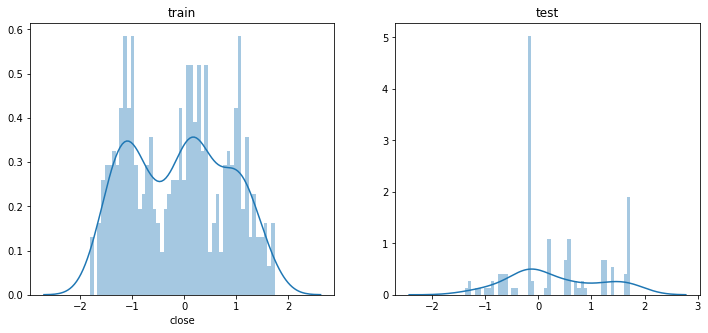

In [153]:
smape_scorer = make_scorer(smape)
k_fold = KFold(n_splits=10, shuffle=True, random_state=seed)
score = cross_val_score(tree, X_train, y_train, cv=k_fold, scoring=smape_scorer)
score = score.mean()
# 0에 근접할수록 좋은 데이터
print("val_SMAPE= {0:.5f}".format(score))

tree_fit = tree.fit(X_train, y_train)
predictions = tree_fit.predict(X_test)
print(predictions.shape)
print(predictions[0:10])
test_score = smape(predictions, y_test)
print("test_SMAPE= {0:.5f}".format(test_score))

plt.plot(test_data['date'], test_data['close'], label='actual')
plt.plot(test_data['date'], predictions, label='predict')
plt.legend()

# 예측한 데이터를 시각화 해본다. 
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(y_train,ax=ax1,bins=50)
ax1.set(title="train")
sns.distplot(predictions,ax=ax2,bins=50)
ax2.set(title="test")

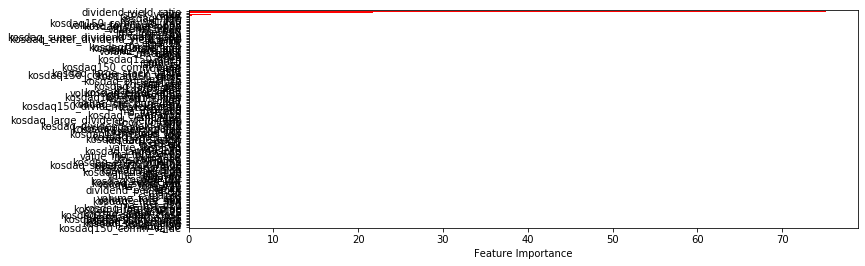

In [154]:
# 특성 중요도 검사 방법 1
Importance = pd.DataFrame({'Importance':tree.feature_importances_*100}, 
                          index = X_train.columns)

Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', 
                                              color = 'r', )

plt.xlabel('Feature Importance')
plt.gca().legend_ = None

In [155]:
Imp = pd.DataFrame({'Importance':tree.feature_importances_*100}, 
                          index = X_train.columns)
Imp.to_csv("feature_importance_reg.csv", mode='w')

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


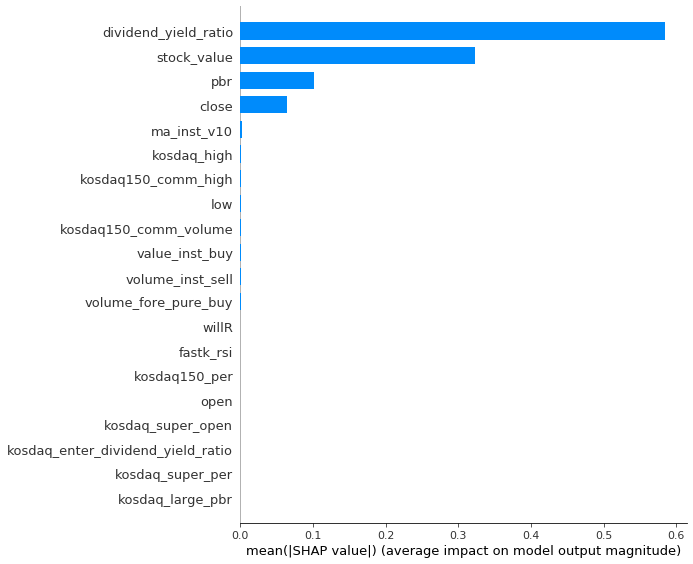

In [156]:
# 특성 중요도 검사 방법 2
explainer = shap.TreeExplainer(tree) # 트리 모델 Shap Value 계산 객체 지정
shap_values = explainer.shap_values(X_test) # Shap Values 계산
shap.summary_plot(shap_values, X_test, plot_type = "bar")

val_SMAPE= 3.46538
(118,)
[-1.37902653 -1.26125043 -1.30995008 -1.15772604 -1.11405287 -1.003365
 -0.96842044 -0.66850222 -0.81566968 -0.66115815]
test_SMAPE= 44.61635


[Text(0.5, 1.0, 'test')]

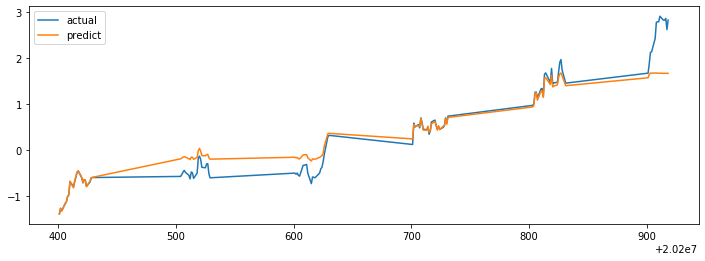

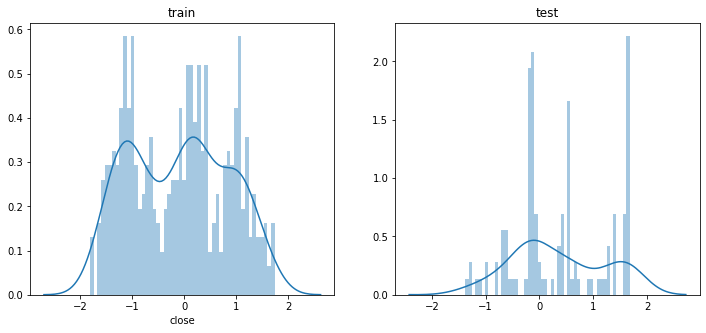

In [157]:
# 2) Random Forest

rand_tree = RandomForestRegressor(n_estimators=400, criterion='mse', max_depth=None, min_samples_split=2, 
                                  min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, 
                                  max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True,
                                  oob_score=False, n_jobs=None, random_state=seed, verbose=0, warm_start=False, ccp_alpha=0.0,
                                  max_samples=None)

smape_scorer = make_scorer(smape)
k_fold = KFold(n_splits=10, shuffle=True, random_state=seed)
score = cross_val_score(rand_tree, X_train, y_train, cv=k_fold, scoring=smape_scorer)
score = score.mean()
# 0에 근접할수록 좋은 데이터
print("val_SMAPE= {0:.5f}".format(score))

rand_tree_fit = rand_tree.fit(X_train, y_train)
rand_predictions = rand_tree_fit.predict(X_test)
print(rand_predictions.shape)
print(rand_predictions[0:10])
test_score = smape(rand_predictions, y_test)
print("test_SMAPE= {0:.5f}".format(test_score))

plt.plot(test_data['date'], test_data['close'], label='actual')
plt.plot(test_data['date'], rand_predictions, label='predict')
plt.legend()

# 예측한 데이터를 시각화 해본다. 
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(y_train,ax=ax1,bins=50)
ax1.set(title="train")
sns.distplot(rand_predictions,ax=ax2,bins=50)
ax2.set(title="test")

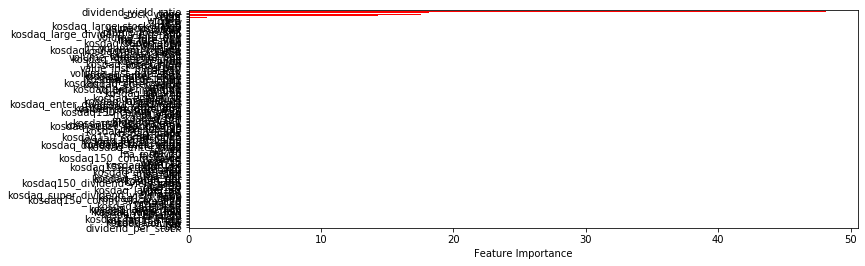

In [158]:
# 특성 중요도 검사 방법 1
Importance = pd.DataFrame({'Importance':rand_tree.feature_importances_*100}, 
                          index = X_train.columns)

Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', 
                                              color = 'r', )

plt.xlabel('Feature Importance')
plt.gca().legend_ = None

In [159]:
Imp = pd.DataFrame({'Importance':rand_tree.feature_importances_*100}, 
                          index = X_train.columns)
Imp.to_csv("feature_importance_rand_reg.csv", mode='w')

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


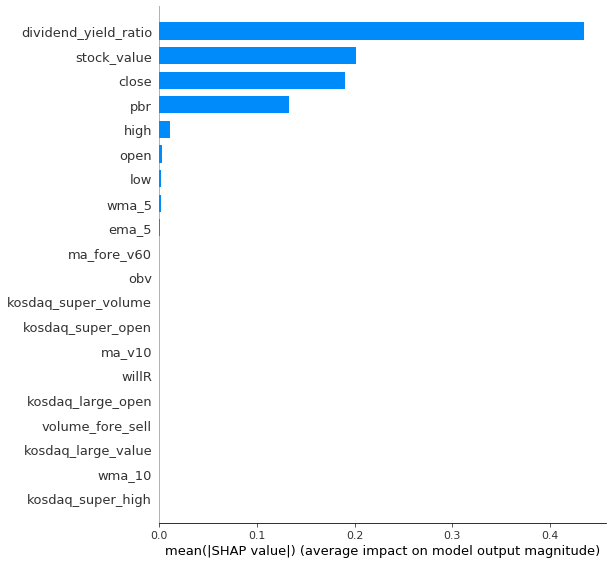

In [160]:
# 특성 중요도 검사 방법 2
explainer = shap.TreeExplainer(rand_tree) # 트리 모델 Shap Value 계산 객체 지정
shap_values = explainer.shap_values(X_test) # Shap Values 계산
shap.summary_plot(shap_values, X_test, plot_type = "bar")

In [166]:
# 3) lightGBM

# load dataset
final_ans = train_data
final_ans_test = test_data

final = pd.concat([final_ans, final_ans_test])
final = final.reset_index()
del final['index']

final = final.sort_values(by=['date'], axis=0)

X = final[final_ans.columns.difference(['close'])]
Y = final['close']

X['date'] = X['date'].astype(float)

x_train, x_valtest, y_train, y_valtest = train_test_split(X, Y, test_size = 0.2, shuffle=False, random_state=seed)
x_val, x_test, y_val, y_test = train_test_split(x_valtest, y_valtest, test_size = 0.5, shuffle=False, random_state=seed)
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape)

(440, 138) (440,) (55, 138) (55,) (56, 138) (56,)



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [167]:
train_lgb = lgb.Dataset(x_train, label = y_train)
val_lgb = lgb.Dataset(x_val, label = y_val)
params = {'random_seed':seed, 'bagging_seed':seed,
          'feature_fraction_seed':seed, 'data_random_seed':seed,
          'drop_seed':seed,
          'num_iterations':1000, #'n_estimators':1000,
          'boosting_type':'gbdt', 'objective':'huber',
          'learning_rate':0.05, 'num_leaves':100, 'max_depth':-1,
          'bagging_fraction':0.1, 'feature_fraction':0.8,
          'lambda_l1':0.0, 'lambda_l2':0.0, 'max_bin':300}
model = lgb.train(params, train_lgb, valid_sets = val_lgb,
                  num_boost_round = 2000, # early_stopping_rounds = 200,
                  verbose_eval = 200)

lgb_test, lgb_valid = model.predict(x_test), model.predict(x_val)

def smape(array_1, array_2):
    score = 100*np.mean(2*abs(array_1 - array_2)/(abs(array_1)+abs(array_2)))
    return score

# predict과 test set의 smape 계산
lgb_test_smape, lgb_valid_smape = smape(lgb_test, y_test), smape(lgb_valid, y_val)
print('result:')
print("val_SMAPE", lgb_valid_smape)
print("test_SMAPE", lgb_test_smape)

Found `num_iterations` in params. Will use it instead of argument


[200]	valid_0's huber: 0.0210129
[400]	valid_0's huber: 0.0209417
[600]	valid_0's huber: 0.0204384
[800]	valid_0's huber: 0.0201123
[1000]	valid_0's huber: 0.0199987
result:
val_SMAPE 59.9952283372973
test_SMAPE 16.070088410961063


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


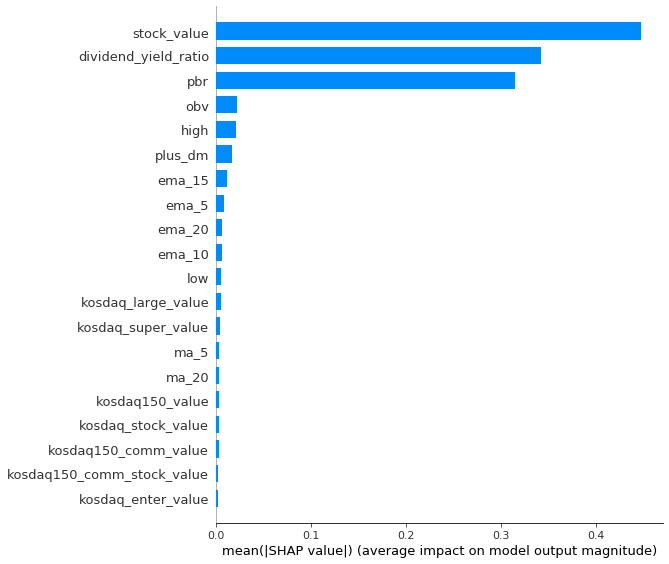

In [168]:
# 특성 중요도 검사 방법 2
explainer = shap.TreeExplainer(model) # 트리 모델 Shap Value 계산 객체 지정
shap_values = explainer.shap_values(x_test) # Shap Values 계산
shap.summary_plot(shap_values, x_test, plot_type = "bar")

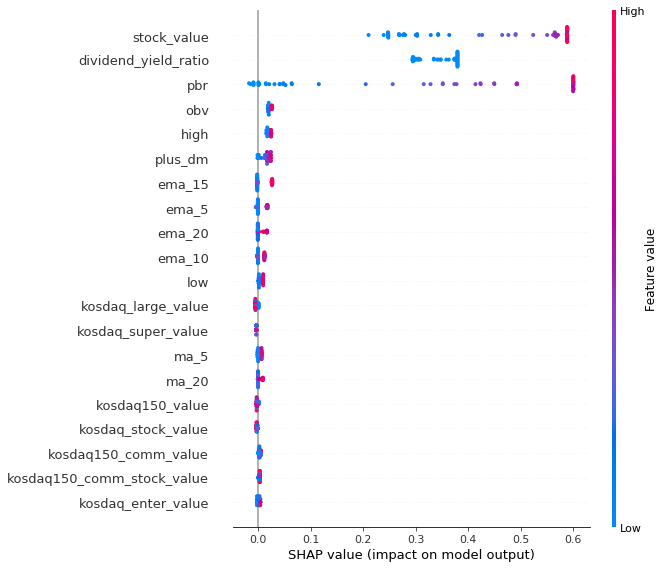

In [169]:
shap.summary_plot(shap_values, x_test)

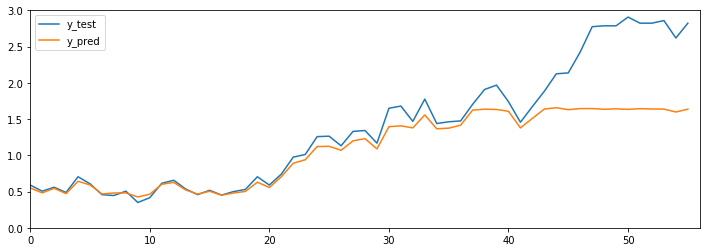

In [170]:
plt.plot(np.array(y_test), label='y_test')
plt.plot(lgb_test, label='y_pred')
plt.xlim(0,len(lgb_test))
plt.ylim(0,3)
plt.legend()
plt.show()

In [171]:
Imp = pd.DataFrame({'Importance':model.feature_importance()}, 
                          index = x_train.columns)
print(Imp.head())
Imp.to_csv("feature_importance_lgbm_reg.csv", mode='w')

      Importance
adx          152
atr          163
bps            0
cci          264
date          30
